In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S15A')

import cv2
import numpy as np
import glob
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt


#Step#1:
#Resize to 150*150, Flip Foreground images and store them. Total 200 fore ground images.Similarly resize 100 background images and store

In [0]:
import cv2_utils
import importlib
importlib.reload(cv2_utils)
image_size = 150
#input_bg_path = "/content/gdrive/My Drive/eva-04/S15A/room/bg150/*.jpg"
#Step#1: flip fg images images and store them
fg_path = "/content/gdrive/My Drive/eva-04/S15A/fg/*.png"
fg_save_path = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/"
#fg_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)#.convert('BGR')
cv2_utils.flip_images_and_store(fg_path,fg_save_path,image_size)

/content/gdrive/My Drive/eva-04/S15A/fg/*.png /content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/ 150
resized shape = (150, 150, 4) flip shape = (150, 150, 4)
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_1.png /content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_1.png
resized shape = (150, 150, 4) flip shape = (150, 150, 4)
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_2.png /content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_2.png
resized shape = (150, 150, 4) flip shape = (150, 150, 4)
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_3.png /content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_3.png
resized shape = (150, 150, 4) flip shape = (150, 150, 4)
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_4.png /content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_4.png
resized shape = (150, 150, 4) flip shape = (150, 150, 4)
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_5.png /content/gdrive/My Driv

#Step:2
#GENERATE FG MASKS

In [0]:
import os

fg150_path = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/*.png"
fg150_mask_path = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150_mask/"

for file in glob.glob(fg150_path):
  print(file)
  fg = cv2.imread(file,-1)
  w,h = fg.shape[:2]
  b,g,r,a = cv2.split(fg)
  fg_mask = np.dstack((a,a,a))
  #convert into gray scale
  gray_mask = cv2.cvtColor(fg_mask, cv2.COLOR_BGR2GRAY)
  gray_mask[gray_mask>0] = 255
  base_filename = os.path.basename(file)        
  fg_filename, fg_extension = os.path.splitext(base_filename)
  mask_path = "mask_"+fg_filename+".jpg"  
  save_fg_mask = fg150_mask_path + mask_path            
  cv2.imwrite(save_fg_mask,gray_mask)


/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_62.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_62.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_64.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_64.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_63.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_63.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_60.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_60.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_61.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_61.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_59.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_59.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_57.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/fg_57.png
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/flip_fg_58.png


#Step:3
#DSIPLAY ALL FOREGROUND IMAGES INCLUDING FLIP . TOTAL 200 IMAGES ON EACH BACK GROUND IMAGE AT 20 POSITIONS. 200*20 = 4000 OVERLAY IMAGES FOR EACH BACK GROUND IMAGE.

TOTAL FGBG IMAGES 100 * 4000 = 400k

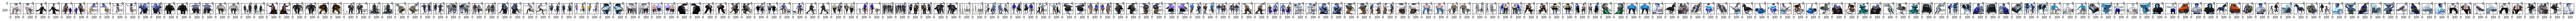

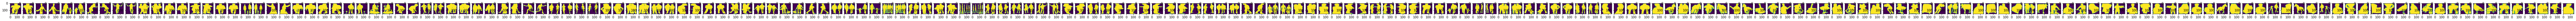

In [0]:
from IPython.display import display, Image
from IPython.display import display
fg150_path = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/*.png"
fg150_mask_path = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150_mask/*.jpg"

plt.figure(figsize=(150,150))
columns = 200
images = []
for file in glob.glob(fg150_path):
  img = cv2.imread(file,-1)
  images.append(img)

for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)


plt.figure(figsize=(150,150))
columns = 200
mask_images = []
for file in glob.glob(fg150_mask_path):
  img = cv2.imread(file,-1)
  mask_images.append(img)

for i, image in enumerate(mask_images):
    plt.subplot(len(mask_images) / columns + 1, columns, i + 1)
    plt.imshow(image)




#Step4:
#Now on each background image, place one foreground image in 20 positions.

#When image goes further it appears to be small. 

#So imitated the same by reducing the size of the image going down the scene

#OPTMIZATION: KEEP THE 200 FG IMAGES IN MEMORY AND CREATE FGBG IMAGES

In [0]:
import cv2_utils
import importlib
importlib.reload(cv2_utils)
import os
import time

fg_folder = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/fg150/*.png"

bg_path = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/bg150/bg23.jpg"
fgbg_save_folder = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/"
fgbg_mask_save_folder = "/content/gdrive/My Drive/eva-04/S15A/Dataset150/mask_fgbg150_23/"

bg_file = os.path.basename(bg_path)
bg = cv2.imread(bg_path)
#fg = cv2.imread(fg_path,-1) # very important
fg_images = []
fg_base_paths = []
count = 0
for fg_path in glob.glob(fg_folder):
  fg = cv2.imread(fg_path,-1) # very important
  fg_images.append(fg)
  fg_file = os.path.basename(fg_path)
  fg_base_paths.append(fg_file)

print(len(fg_base_paths),len(fg_images))
# Create 20 sub images for every fg and store
fg_dict = dict()
for i in range (len(fg_base_paths)):
  fg = fg_images[i]
  path = fg_base_paths[i]
  # resize them
  fg_image_resized_list = []   
  fg_resized = cv2.resize(fg, (90,90), interpolation = cv2.INTER_AREA)#.convert('BGR')
  fg_image_resized_list.append(fg_resized)
  fg_resized = cv2.resize(fg, (80,80), interpolation = cv2.INTER_AREA)#.convert('BGR')
  fg_image_resized_list.append(fg_resized)
  fg_resized = cv2.resize(fg, (70,70), interpolation = cv2.INTER_AREA)#.convert('BGR')
  fg_image_resized_list.append(fg_resized)
  fg_resized = cv2.resize(fg, (60,60), interpolation = cv2.INTER_AREA)#.convert('BGR')
  fg_image_resized_list.append(fg_resized)
  fg_dict[path] = fg_image_resized_list

import time
#for i in range (len(fg_images)):
for i in range (len(fg_images)):
  count = count + 1
  #fg = fg_images[i] # just take from memory
  fg_file = fg_base_paths[i] # just take from memory
  #fg = cv2.imread(fg_path,-1) # very important
  fg_list = fg_dict.get(fg_file)
  #print(len())
  cv2_utils.create_20_fgbg_overlay_and_mask_from_bgfg(bg,fg_list,bg_file,fg_file,fgbg_save_folder,fgbg_mask_save_folder)
  time.sleep(1)
 
  print(fg_file,"-Done-",count)




200 200
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_0_flip_fg_62.jpg /content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_0_flip_fg_62.jpg
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_1_flip_fg_62.jpg /content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_1_flip_fg_62.jpg
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_2_flip_fg_62.jpg /content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_2_flip_fg_62.jpg
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_3_flip_fg_62.jpg /content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_3_flip_fg_62.jpg
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_4_flip_fg_62.jpg /content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_0_4_flip_fg_62.jpg
/content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_1_0_flip_fg_62.jpg /content/gdrive/My Drive/eva-04/S15A/Dataset150/fgbg150_23/bg23_1_0_flip_fg_62.

Step5:GENERATING DEPTH IMAGES FOR OVERLAYED IMAGES


In [0]:
!git clone https://github.com/ialhashim/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 235 (delta 0), reused 1 (delta 0), pack-reused 231
Receiving objects: 100% (235/235), 11.80 MiB | 14.32 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [0]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseDepth/nyu.h5

--2020-05-03 06:50:28--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.28.3
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.28.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DenseDepth/nyu.h5’

./DenseDepth/nyu.h5 100%[===================>] 164.89M  86.2MB/s    in 1.9s    

2020-05-03 06:50:30 (86.2 MB/s) - ‘./DenseDepth/nyu.h5’ saved [172897376/172897376]



#Step#6:
https://drive.google.com/drive/folders/1IucmmNUapKK1i_ORIdxYSMtA72qcxTa9?usp=sharing

#Below is the folder structure explanation  
#fg -> foreground images original 
#bg -> background images original 
#fg150 ->for ground images resized
#bg150 -> background images resized
#fgbg150_i -> fgbg over layed images. {i} stands for all image combinations on bg{i} image. i ->0 to 100 
#mask_fgbg150_i -> masks for fgbg150_i
